In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler   # this is to scale the data 

In [2]:
airline=pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 7/EastWestAirlines.csv')
airline.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline1=airline.drop(['ID'],axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# data scaling
scaler=StandardScaler()
airline_scale=scaler.fit_transform(airline1)
airline_scale

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

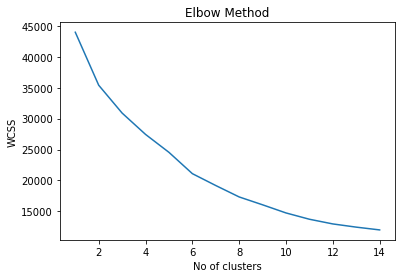

In [5]:
#finding optimum k value
wcss=[]
for i in range(1,15):
    Kmeans=KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(airline_scale)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [6]:
new_cluster=KMeans(6,random_state=10)
new_cluster.fit(airline_scale)

KMeans(n_clusters=6, random_state=10)

In [11]:
wcss # error 

[43989.000000000015,
 35409.51145242436,
 30899.246824652197,
 27446.37245668138,
 24541.32958204578,
 21089.97362892964,
 19165.861458655665,
 17316.866446128297,
 16043.406242309518,
 14726.983322766795,
 13705.961065176245,
 12946.804929785303,
 12427.824212114187,
 11978.22686087686]

In [7]:
new_cluster.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
airline['clusterid_new'] =new_cluster.labels_
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [9]:
airline.sort_values('clusterid_new').head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2468,2487,22077,0,1,1,1,1385,4,0,0,3187,0,0
2470,2489,95916,0,3,1,1,11845,11,0,0,3182,0,0
2471,2490,122164,0,2,1,1,9944,16,0,0,3182,0,0
2476,2495,98339,0,3,1,1,16336,13,0,0,3145,0,0


In [10]:
airline.groupby('clusterid_new').agg('mean').reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,2279.480964,43355.506024,71.978795,1.307470,1.000000,1.000482,4746.666024,7.132530,152.680482,0.459277,3619.093494,0.000000
1,1,1960.164634,57999.600000,239.258537,1.692683,1.000000,1.000000,10654.035366,10.578049,419.618293,1.267073,4234.540244,0.995122
2,2,1493.766593,137281.744469,130.703540,4.103982,1.000000,1.002212,47683.837389,19.642699,362.397124,1.107301,5070.663717,0.582965
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,1740.028169,194887.683099,777.661972,2.281690,1.000000,1.000000,34012.880282,28.098592,5764.816901,16.767606,4679.049296,0.795775
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


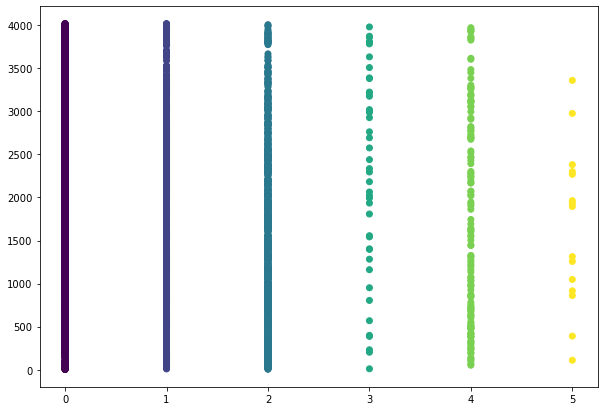

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusterid_new'],airline['ID'], c=new_cluster.labels_) 